# Kapitel 2 - Das Korpus

## 2.1. Kapitelübersicht <a class="anchor" id="2-1"/>

Textklassifikationsverfahren klassifizieren anhand von Textdaten. Gesammelte Textdaten werden auch <b>Textkorpus</b> genannt. In diesem Kapitel untersuchen wir einen kleinen Filmrezensionendatensatz und ein Wikipedia-Korpus, schauen uns die Verteilung der Daten und die Besonderheiten der Datensätze an.

<b>Abschnittsübersicht</b><br>

[2.1. Kapitelübersicht](#2-1)<br>
[2.2. Analyse eines kleinen Datensatzes](#2-2)<br>
[2.3. Aufbau des Wikipedia-Korpus](#2-3)<br>
[2.4. Mögliche Fehler](#2-4)<br>

Am Ende dieses Kapitel werden wir folgende Themen behandelt und/oder vertieft haben:
- Verteilung der Klassen von Datensätzen
- Visualisierung der Klassenverteilung
- Besonderheiten des Wikipedia-Korpus
- Unterschiede der Korpus-Versionen

## 2.2. Analyse eines kleinen Datensatzes <a class="anchor" id="2-2"/>

Textklassifikation kann nur anhand von Daten durchgeführt werden. Diese Daten müssen aus zwei wesentlichen Bestandteilen bestehen: Texten und Klassen. Klassen können bei einer Textklassifikation sehr unterschiedliche Dinge sein, z.B. ein Musikgenre, ein Username, eine Zusammenfassung oder eine Punktzahl. Sie müssen nicht unbedingt Strings sein, sondern können auch aus Integern oder Floats bestehen. Im folgenden Beispiel schauen wir uns einen Datensatz an, dessen Textdaten Filmrezensionen und dessen Klassen Schulnoten von 1-6 sind.

In [13]:
import pandas as pd

d = {"r1": [1, "Der Film war so genial!"], 
     "r2": [6, "Schlechtester Film aller Zeiten!!!!1!!!1!!"],
     "r3": [3, "Er war schon okay"],
     "r4": [1, "Ich will den Film für den Rest meines Lebens jeden Tag gucken :O"],
     "r5": [2, "Richtig guter Film mit kleineren Schwächen"],
     "r6": [4, "Naja, gibt besseres, aber auch schlechteres, wenn auch nicht viel..."],
     "r7": [5, "Bis auf die Songauswahl war der Film zum Kotzen"]}
df = pd.DataFrame.from_dict(d, orient="index", columns=["Note", "Rezension"])
df

,Note,Rezension
r1,1,Der Film war so genial!
r2,6,Schlechtester Film aller Zeiten!!!!1!!!1!!
r3,3,Er war schon okay
r4,1,Ich will den Film für den Rest meines Lebens j...
r5,2,Richtig guter Film mit kleineren Schwächen
r6,4,"Naja, gibt besseres, aber auch schlechteres, w..."
r7,5,Bis auf die Songauswahl war der Film zum Kotzen


Ein guter erster Schritt, um sich mit einem Datensatz vertraut zu machen, ist eine <b>Verteilung</b> der Klassen zu visualisieren. Wir können somit erkennen, dass jede Schulnote in unserem Datensatz einmal vorkommt. Nur die Note "1" kommt zweimal vor. Keine der Schulnoten fehlt, weshalb ein Klassifizierungsverfahren bei einer Voraussage von neuen Texten jede Schulnote vergeben könnte.

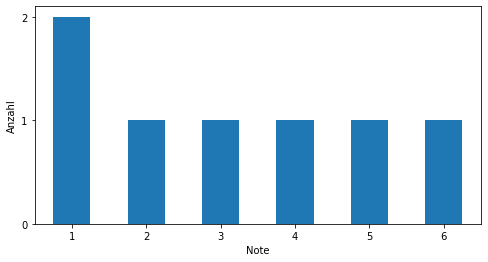

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
ax = df.groupby('Note').Rezension.count().plot.bar(rot=0)
ax.set_ylabel("Anzahl")
ax.set_yticks([0, 1, 2])
plt.show()

Dieser Datensatz ist nicht besonders groß. Eine Textklassifizierung wäre hier nicht unbedingt nötig, da dies von Menschen schneller erledigt werden kann. Bei größeren Datensätzen ist eine menschliche Textklassifikation entweder sehr aufwändig oder nicht möglich.

## 2.3. Aufbau des Wikipedia-Korpus <a class="anchor" id="2-3"/>

Im Gegensatz zu englischsprachigen Datensätzen sind deutschsprachige Datensätze nicht so weit verbreitet und sie sind nicht so präsent wie die englischsprachigen Datensätze. Das Unternehmen Lionbridge hat eine Liste von deutschen <a href="https://lionbridge.ai/datasets/20-best-german-language-datasets-for-machine-learning/">Datensätzen</a> erstellt, womit zumindest ein Überblick über deutschsprachige Datensätze geliefert wird. Wir werden in diesem Tutorial ein von mir selbst erstelltes Korpus verwenden. Es ist eine verbesserte Version des Korpus, der im Zuge des "Word Embeddings"-Seminars an der Julius-Maximilians-Universität im Wintersemester 2018/19 entstanden ist. Dieses Korpus besteht aus Wikipediartikeln, deren Klassen Kategorien von Wikipedia sind. Das selbsterstelle Tool "wikiparser.py" befindet sich ebenfalls im Github-Projet <a href="https://github.com/realjanpaulus/german_text_classification_nlp">german_text_classification_nlp</a>. Eine Erläuterung, wie dieses Korpus erstellt wurde und wie die Daten nachbearbeitet wurden, befindet sich im Zusatzkapitel "Wie baue ich mein eigenes Wikipediakorpus?". In diesem Kapitel soll zunächst nur ein Einblick in das Korpus gegeben werden.

In [15]:
corpus = pd.read_csv("wikicorpus_v2.csv", index_col=0)
corpus.head()

,id,category,length,text
0,3470,Album nach Typ,1050,All the Best ! ( englisch Alles Gute ! ) ist d...
1,3611,Album nach Typ,525,Let It Roll : Songs by George Harrison ist das...
2,3612,Album nach Typ,251,Lieder wie Orkane ist das dritte offizielle Be...
3,3613,Album nach Typ,756,Long Stick Goes Boom : The Anthology ist eine ...
4,3614,Album nach Typ,260,Los Grandes Éxitos en Español ( spanisch für D...


Jede Zeile unseres Korpus repräsentiert einen Artikel von Wikipedia. Jeder Artikel hat 4 Eigenschaften, repräsentiert durch die Spalten: Eine ID (<b>"id"</b>), eine Kategorie (<b>"category"</b>), eine Länge (<b>"length"</b>) und der Artikel selber (<b>"text"</b>").<br>
Wie bereits beim Filmrezensionen-Datensatz schauen wir uns zuerst die <b>Verteilung der Klassen</b> an.

#### Verteilung der Klassen

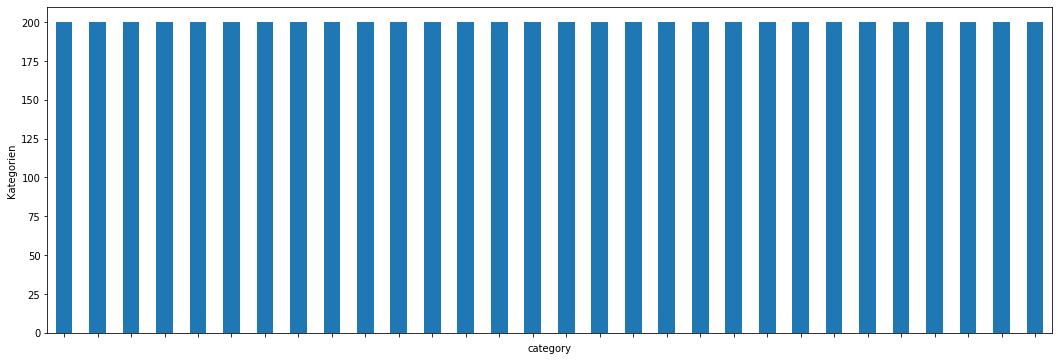

In [16]:
plt.figure(figsize=(18,6))
ax = corpus.groupby('category').text.count().plot.bar(rot=0)
ax.set_ylabel("Anzahl der Artikel")
ax.set_ylabel("Kategorien")
ax.set_xticklabels([])
plt.show()

Die zweite Version des Korpus, die wir hier sehen, wurde so bearbeitet, dass sie für jede Kategorie die gleiche Anzahl an Artikeln (genau 200) enthält. Die erste Version des Korpus sieht da noch anders aus:

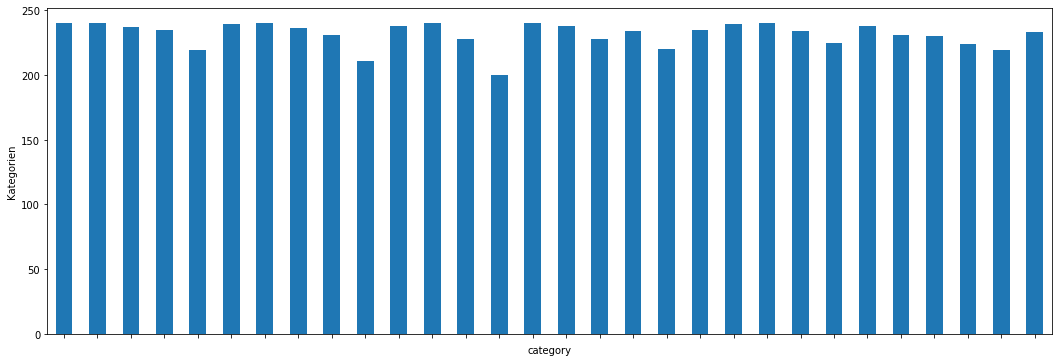

In [17]:
old_corpus = pd.read_csv("wikicorpus.csv", index_col=0)
plt.figure(figsize=(18,6))
ax2 = old_corpus.groupby('category').text.count().plot.bar(rot=0)
ax2.set_ylabel("Anzahl der Artikel")
ax2.set_ylabel("Kategorien")
ax2.set_xticklabels([])
plt.show()

Durch die Anpassung des ursprünglichen Korpus ist die Anzahl der Artikel insgesamt verringert worden.

In [18]:
print(corpus.shape)
print(old_corpus.shape)

(6000, 4)
(6942, 3)


#### Anzahl der Kategorien

Für Textklassifizierungsverfahren sind die Anzahl der <b>Klassen</b> (hier die Kategorien) sehr wichtig, um ein geeignetes Verfahren aussuchen zu können.

In [19]:
print(corpus.category.unique())
print(f"\n Das Korpus umfasst {len(corpus.category.unique())} verschiedene Kategorien.")

['Album nach Typ' 'Alternative-Rock-Band' 'Burg in Deutschland'
 'Chemikaliengruppe' 'Computerspiel nach Plattform'
 'Deutsche Vereine nach Bundesland' 'Einzelsprache'
 'Fernsehserie nach Staat' 'Film nach Staat' 'Frauenfußball'
 'Gemälde nach Jahrhundert' 'Herrscher nach Titel' 'Internet'
 'Kostümkunde' 'Krankheit' 'Kreditgeschäft' 'Krieg nach Typ'
 'Kunst (Deutschland)' 'Literatur (Romantik)' 'Literaturwissenschaft'
 'Logik' 'Millionenstadt' 'Oper' 'PKW-Modell' 'Planung und Organisation'
 'See in Deutschland' 'Soziologie' 'Wald' 'Western' 'Wirtschaft']

 Das Korpus umfasst 30 verschiedene Kategorien.


Das Korpus hat 30 verschiedene Kategorien, wir müssen also eine <b>Multiclass Klassifizierung</b> verwenden.

#### Größte und kleinste Artikel

Weitere Dinge, die man beim Korpus betrachten kann, sind die Länge der einzelnen Texte. Dabei sortieren wir einmal nach den längsten und nach den kürzesten Artikeln, um uns die minimale und maximale Länge der Artikel anzeigen zu lassen.

In [20]:
corpus.sort_values(by=["length"], ascending=False).head()

,id,category,length,text
3001,6716,Kreditgeschäft,3531,Ein Annuitätendarlehen ist ein Tilgungsdarlehe...
615,535,Chemikaliengruppe,3429,Als Sulfosalze bezeichnet man in der Chemie di...
4179,1131,Logik,3144,"Sortenlogik entspringt der Intention , das ( m..."
1668,2123,Film nach Staat,2953,Diese Liste beinhaltet bekannte Darsteller des...
5885,4834,Wirtschaft,2944,Der Gini-Koeffizient oder auch Gini-Index ist ...


In [21]:
corpus.sort_values(by=["length"], ascending=True).head()

,id,category,length,text
5187,1525,See in Deutschland,101,Der Stotzweiher ist ein See in Mannheim . Er i...
5854,4761,Wirtschaft,101,Der Ecklohn ( auch : Eckentgelt ) dient bei Ta...
3349,3238,Krieg nach Typ,101,Der Bailinga-Aufstand in den 1860er Jahren war...
3169,6751,Kreditgeschäft,101,Ein Credit Default Swap Index oder kurz auch C...
2315,1903,Herrscher nach Titel,101,Tokugawa Yoshimune ( jap . ; * 27 . November...


Der Datensatz sagt uns jedoch nicht, wie `length` berechnet wird. Es könnte entweder die Anzahl der Tokens oder die Anzahl der Wörter sein. Dies finden wir nun heraus, indem wir den Text der ID 1525 untersuchen.

In [22]:
stotzweiher_row = corpus.loc[corpus['id'] == 1525]
stotzweiher = list(stotzweiher_row["text"])[0]

In [23]:
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

print(f"Länge des Textes mit Zeichen: {len(word_tokenize(stotzweiher))}.")
print(f"Länge des Textes ohne Zeichen: {len(tokenizer.tokenize(stotzweiher))}.")

Länge des Textes mit Zeichen: 101.
Länge des Textes ohne Zeichen: 92.


#### Limitationen des Korpus

Eine weiter Möglichkeit, sich mit einem Korpus vertraut zu machen, ist herauszufinden, was das Korpus <u>nicht</u> bereitstellt. In unserem Fall können wir z.B. keinen Wikipediartikel anhand seines Artikelnamens finden, da wir keine Spalte mit Artikelnamen haben. Für die spätere Textklassifikation ist dies irrelevant, da uns die ID ausreicht, für andere Anwendungszenarien könnte es jedoch ein wichtiges Kriterium sein.

## 2.4. Mögliche Fehler <a class="anchor" id="2-4"/>

- falsches Wikipedia-Korpus importiert → es gibt zwei Wikipedia-Korpora, `wikicorpus.csv` und `wikicorpus_v2.csv`. Die zweite Version hat ein ausgewogene Verteilung der Klassen und einige Vorverarbeitungsschritte wurden schon erledigt. Für diese Tutorialreihe gilt, dass wenn nichts anderes angegeben ist, `wikicorpus_v2.csv` genutzt werden sollte.
- Kategorie "Unnamed: 0" oder "Unnamed: 1" → Beim Importieren des Korpus sollte immer der Parameter `index_col = 0` ausgewählt werden, damit pandas die Indexspalte nicht importiert.